In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv('yelp_reviews_chainness.csv')
# df = df.drop(columns=['Unnamed: 0'])
df.head()

C:\Users\anuja\AppData\Local\Temp\ipykernel_25848\2961215072.py:1: DtypeWarning: Columns (4,6,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('yelp_reviews_chainness.csv')


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,...,emp,qp1_nf,qp1,ap_nf,ap,est,city,stabbr,cty_name,walk_scores
0,pNbrxyrG5d5QwRsKbu0cXg,46-new-york,46,https://s3-media3.fl.yelpcdn.com/bphoto/PDgpYA...,False,https://www.yelp.com/biz/46-new-york?adjust_cr...,97,"[{'alias': 'desserts', 'title': 'Desserts'}]",4.5,"{'latitude': 40.7152930293439, 'longitude': -7...",...,68109.0,H,3384016.0,G,9403349.0,4574.0,NEW YORK,NY,NEW YORK,99.0
1,8Oo2AtQEPDfxIOnA8wfXoQ,886-new-york,886,https://s3-media3.fl.yelpcdn.com/bphoto/N-V-Dl...,False,https://www.yelp.com/biz/886-new-york?adjust_c...,693,"[{'alias': 'taiwanese', 'title': 'Taiwanese'},...",4.0,"{'latitude': 40.72877, 'longitude': -73.98873}",...,82374.0,G,1908102.0,G,7643447.0,4093.0,NEW YORK,NY,NEW YORK,100.0
2,fNKYBpQJivICm0ORb3nb_Q,8282-new-york-2,8282,https://s3-media2.fl.yelpcdn.com/bphoto/jMQtrS...,False,https://www.yelp.com/biz/8282-new-york-2?adjus...,178,"[{'alias': 'korean', 'title': 'Korean'}]",4.5,"{'latitude': 40.72161, 'longitude': -73.98875}",...,19971.0,G,173596.0,G,902676.0,2667.0,NEW YORK,NY,NEW YORK,88.0
3,cuqT0Venx12D4bil06J1UA,purnima-halal-brooklyn,Purnima Halal,NaN,False,https://www.yelp.com/biz/purnima-halal-brookly...,1,"[{'alias': 'grocery', 'title': 'Grocery'}]",5.0,"{'latitude': 40.6806, 'longitude': -73.95104}",...,7132.0,G,74247.0,G,329737.0,997.0,BROOKLYN,NY,KINGS,96.0
4,Wt306odjwl9oRhN04IMLNw,essen-new-york-5,'ESSEN,https://s3-media4.fl.yelpcdn.com/bphoto/xES9bf...,False,https://www.yelp.com/biz/essen-new-york-5?adju...,126,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...",2.5,"{'latitude': 40.7534141540527, 'longitude': -7...",...,123799.0,G,3455366.0,G,12854197.0,5641.0,NEW YORK,NY,NEW YORK,98.0


In [102]:
# Function to normalize names
def normalize_name(name):
    return ''.join(e for e in name if e.isalnum()).lower()

df['normalized_name'] = df['name'].apply(normalize_name)
    
# # Sort DataFrame based on the normalized 'name' column
# df.sort_values(by='normalized_name', inplace=True)

In [103]:
df['review_texts']

0        ["Cash only for transactions under $5. \n\nAma...
1        ["Love that this place kind of mimic the Asian...
2        ["This is a small Korean fusion tapas restaura...
3        ["Wide selection, all clean and new. Welcoming...
4        ["Been coming here for the Udon for years ,\nW...
                               ...                        
21980    ["Exceptional service. She listens but above a...
21981    ["I came here for a family dinner - the decor ...
21982    ["Zyoga is owned by 2 fabulous yoga teachers, ...
21983    ["Loved Loved this place ! Everyone is so nice...
21984    ["The owner is very friendly and workers are v...
Name: review_texts, Length: 21985, dtype: object

In [104]:
from ast import literal_eval
# Handle NaN values before applying literal_eval
def safe_literal_eval(x):
    try:
        return literal_eval(x)
    except (ValueError, SyntaxError):
        return None

df['review_ratings'] = df['review_ratings'].apply(lambda x: safe_literal_eval(x) if pd.notna(x) else [])


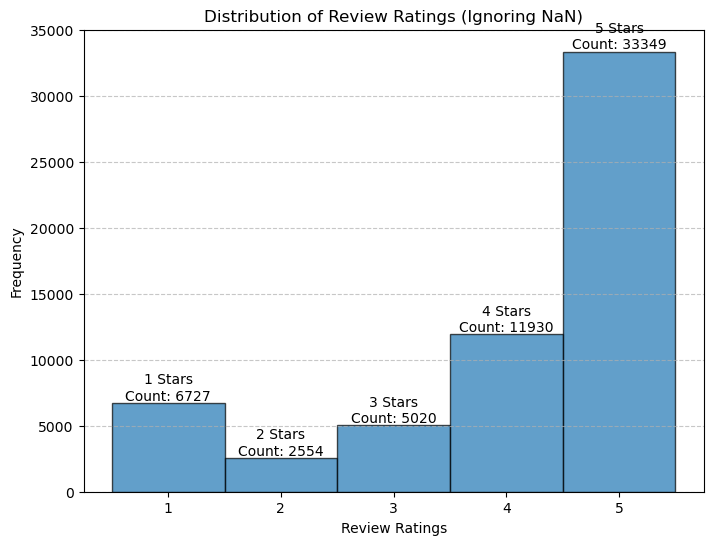

In [105]:


# Flatten the list of review ratings, ignoring NaN entries
flat_ratings = [rating for sublist in df['review_ratings'].dropna() for rating in sublist]
flat_ratings
# Plot the distribution using a histogram
plt.figure(figsize=(8, 6))
plt.hist(flat_ratings, bins=range(1, 7), align='left', edgecolor='black', alpha=0.7)
plt.xlabel('Review Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Review Ratings (Ignoring NaN)')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Count occurrences of each star rating and print labels with counts
rating_counts = pd.Series(flat_ratings).value_counts().sort_index()
for rating, count in rating_counts.items():
    plt.text(rating, count, f'{rating} Stars\nCount: {count}', ha='center', va='bottom')

plt.show()

In [106]:
len(flat_ratings)

59580

In [107]:
df["categories"]

0             [{'alias': 'desserts', 'title': 'Desserts'}]
1        [{'alias': 'taiwanese', 'title': 'Taiwanese'},...
2                 [{'alias': 'korean', 'title': 'Korean'}]
3               [{'alias': 'grocery', 'title': 'Grocery'}]
4        [{'alias': 'salad', 'title': 'Salad'}, {'alias...
                               ...                        
21980    [{'alias': 'florists', 'title': 'Florists'}, {...
21981    [{'alias': 'halal', 'title': 'Halal'}, {'alias...
21982                 [{'alias': 'yoga', 'title': 'Yoga'}]
21983    [{'alias': 'waxing', 'title': 'Waxing'}, {'ali...
21984    [{'alias': 'massage', 'title': 'Massage'}, {'a...
Name: categories, Length: 21985, dtype: object

In [108]:
# Convert the 'categories' strings to actual lists of dictionaries
df['categories'] = df['categories'].apply(lambda x: safe_literal_eval(x) if pd.notna(x) else [])

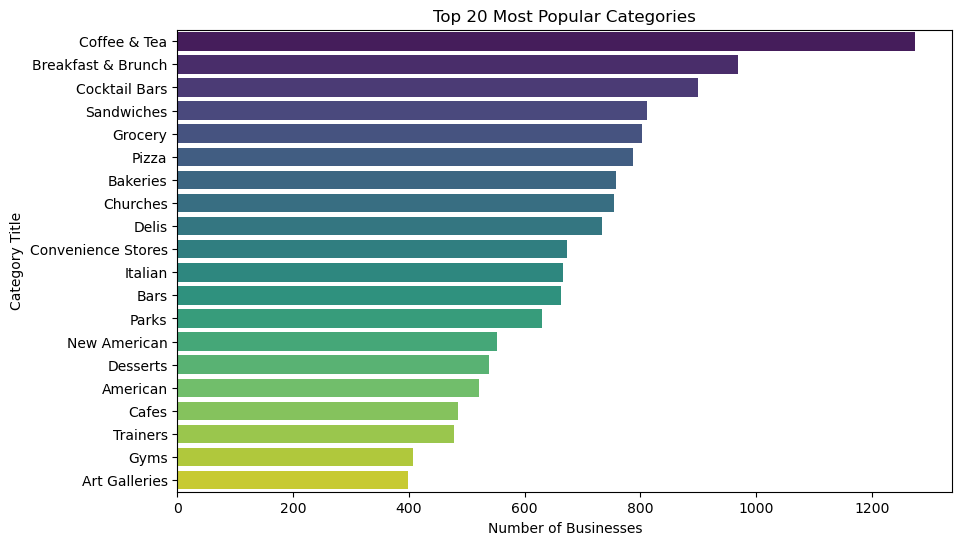

In [109]:
from collections import Counter
# Flatten the list of dictionaries and extract 'title' values
category_titles = [category['title'] for sublist in df['categories'].dropna() for category in sublist]
# category_titles
# Count the occurrences of each category title
category_counts = Counter(category_titles)

# Select the top 10 most popular categories
top_categories = dict(category_counts.most_common(20))

# Plot the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_categories.values()), y=list(top_categories.keys()), palette="viridis")
plt.xlabel('Number of Businesses')
plt.ylabel('Category Title')
plt.title('Top 20 Most Popular Categories')
plt.show()

In [110]:
import pandas as pd
from textblob import TextBlob
from ast import literal_eval
df['review_texts'] = df['review_texts'].apply(lambda x:literal_eval(x) if pd.notna(x) else [])

In [118]:

df['review_texts'][0]


['Cash only for transactions under $5. \n\nAmazing soy milk and red bean buns (豆沙包)! 6-pack of buns for $7. \n\nTo prepare them, I simply splashed some water on...',
 'Store is small with the front counter full of sticky rice and rice cakes, etc.; soy milk and frozen items to buy. Behind the counter is steamed soy dessert,...',
 "I'm not a fan of tofu and neither is L so we didn't try the freshly made tofu that other customers came for. I just wanted some grass jelly $3 each for a..."]

In [123]:
# Define keywords related to cultural importance
cultural_keywords = [
    "heritage",
    "tradition",
    "historic",
    "cultural",
    "iconic",
    "symbolic",
    "landmark",
    "legacy",
    "traditional",
    "customs",
    "local",
    "authentic",
    "indigenous",
    "roots",
    "folklore",
    "rituals",
    "ancestral",
    "time-honored",
    "folk",
    "historical",
    "classical",
    "time-tested",
    "vintage",
    "classical",
    "sentimental",
    "artisanal",
    "artisan",
    "craftsmanship",
    "artisanal",
    "handmade",
    "classic",
    "traditional",
    "antique",
    "nostalgic",
    "memory",
    "past",
    "old-world",
    "cultural heritage",
    "vintage",
    "historical",
    "time-honored",
    "provincial",
    "enduring",
    "local culture",
    "age-old",
    "ageless",
    "rooted",
    "established",
    "cherished",
    "ancient"
]

# Calculate sentiment score for cultural importance
def calculate_cultural_sentiment(reviews):
    if reviews and isinstance(reviews, list):
        combined_text = " ".join(reviews)
        blob = TextBlob(combined_text)
        sentiment_score = blob.sentiment.polarity
        # Check for the presence of cultural keywords
        for keyword in cultural_keywords:
            if keyword in combined_text.lower():
                sentiment_score += 0.2  # Adjust the weight based on your preference
        return sentiment_score
    return None

# Apply the function to calculate cultural sentiment score
df['cultural_sentiment'] = df['review_texts'].apply(calculate_cultural_sentiment)

# Display the modified DataFrame
print(df[['review_texts', 'cultural_sentiment']])

                                            review_texts  cultural_sentiment
0      [Cash only for transactions under $5. \n\nAmaz...            0.052778
1      [Love that this place kind of mimic the Asian ...            0.145909
2      [This is a small Korean fusion tapas restauran...            0.277778
3      [Wide selection, all clean and new. Welcoming ...            0.229004
4      [Been coming here for the Udon for years ,\nWh...            0.245189
...                                                  ...                 ...
21980  [Exceptional service. She listens but above al...            0.294048
21981  [I came here for a family dinner - the decor o...            0.331597
21982  [Zyoga is owned by 2 fabulous yoga teachers, D...            0.100000
21983  [Loved Loved this place ! Everyone is so nice ...            0.372843
21984  [The owner is very friendly and workers are ve...            0.567500

[21985 rows x 2 columns]


In [146]:
# df = df.drop(columns=['sentiment'])
df.to_csv("yelp_reviews_chainness.csv")

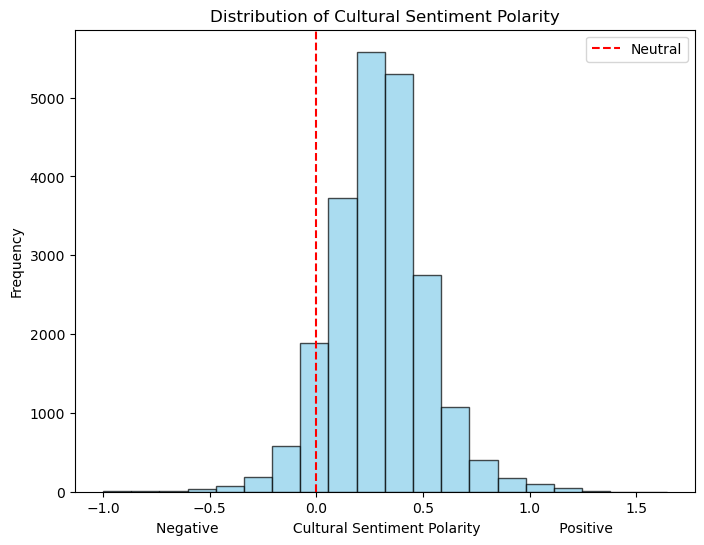

In [124]:
# Plot the histogram of sentiment values with lines for neutrality, positive, and negative
plt.figure(figsize=(8, 6))
plt.hist(df['cultural_sentiment'].dropna(), bins=20, edgecolor='black', color='skyblue', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label='Neutral')
# plt.axvline(x=0.2, color='green', linestyle='--', label='Positive')
# plt.axvline(x=-0.2, color='red', linestyle='--', label='Negative')
plt.xlabel('Negative                 Cultural Sentiment Polarity                  Positive')
plt.ylabel('Frequency')
plt.title('Distribution of Cultural Sentiment Polarity')
plt.legend()
plt.show()

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from ast import literal_eval
import pandas as pd
from itertools import chain

In [142]:
# Zip ratings and texts, filter out rows with a mismatch in counts, and explode the lists into separate rows
exploded_df = df.explode('review_ratings')

# Reset the index
exploded_df = exploded_df.reset_index(drop=True)

# Rename columns
exploded_df.columns

# Display the rearranged DataFrame
# print(exploded_df[:1])
# Separate reviews based on ratings
# positive_reviews = ' '.join(exploded_df[exploded_df['rating'].isin([4, 5])]['text'])
# negative_reviews = ' '.join(exploded_df[exploded_df['rating'].isin([1, 2])]['text'])
# # Generate word clouds
# positive_wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(positive_reviews)
# negative_wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(negative_reviews)

# # Plot the word clouds
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.imshow(positive_wordcloud, interpolation='bilinear')
# plt.title('Positive Reviews Word Cloud')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(negative_wordcloud, interpolation='bilinear')
# plt.title('Negative Reviews Word Cloud')
# plt.axis('off')

# plt.show()

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'location',
       'phone', 'display_phone', 'distance', 'price', 'latitude', 'longitude',
       'zip_codes', 'address', 'review_texts', 'review_ratings',
       'review_times', 'chain_id_cosine', 'chain_id_jaccard',
       'chain_id_levenshtein', 'chain_id_fuzzy', 'chain_count', 'chain_type',
       'chain_avg_dist', 'name_y', 'emp_nf', 'emp', 'qp1_nf', 'qp1', 'ap_nf',
       'ap', 'est', 'city', 'stabbr', 'cty_name', 'walk_scores',
       'normalized_name', 'sentiment', 'cultural_sentiment'],
      dtype='object')

In [129]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Download the NLTK stop words
nltk.download('stopwords')

# Get the stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anuja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anuja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [130]:


# Sample positive and negative reviews
positive_reviews = ' '.join(exploded_df[exploded_df['rating'].isin([4, 5])]['text'])
negative_reviews = ' '.join(exploded_df[exploded_df['rating'].isin([1, 2])]['text'])

# Tokenize the reviews
positive_tokens = nltk.word_tokenize(positive_reviews)
negative_tokens = nltk.word_tokenize(negative_reviews)

# Remove stop words
positive_tokens = [word for word in positive_tokens if word.lower() not in stop_words]
negative_tokens = [word for word in negative_tokens if word.lower() not in stop_words]

# Join the tokens back into strings
positive_reviews_no_stopwords = ' '.join(positive_tokens)
negative_reviews_no_stopwords = ' '.join(negative_tokens)

# WordCloud for positive reviews without stop words
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews_no_stopwords)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud (No Stop Words)')
plt.axis('off')
plt.show()

# WordCloud for negative reviews without stop words
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews_no_stopwords)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud (No Stop Words)')
plt.axis('off')
plt.show()


NameError: name 'exploded_df' is not defined